# Analiza wyników dotyczących wulkanizmu ziemskiego w epoce holocenu
## Analiza wyników zadań z zestawu

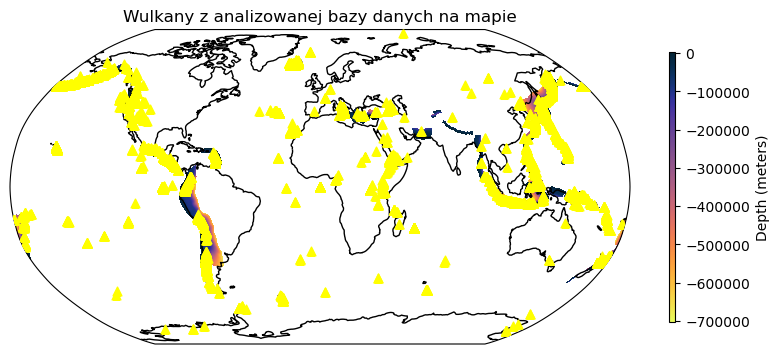

In [84]:
import rockhound as rh
import matplotlib.pyplot as plt
import cmocean
import cartopy.crs as ccrs

from rockhound.slab2 import ZONES

eruptions_data=pd.read_csv("raw_data.csv",skiprows=1)

subduction_zones = []
for zone in ZONES:
    subduction_zones.append(rh.fetch_slab2(zone))

vmax = max([grid.depth.actual_range[1] for grid in subduction_zones])
vmin = min([grid.depth.actual_range[0] for grid in subduction_zones])

plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.Robinson())
for grid in subduction_zones:
    pc = grid.depth.plot.pcolormesh(
        cmap=cmocean.cm.thermal_r,
        ax=ax,
        transform=ccrs.PlateCarree(),
        add_colorbar=False,
        vmin=vmin,
        vmax=vmax,
    )
plt.colorbar(
    pc,
    ax=ax,
    label="Depth (meters)",
    pad=0.05,
    aspect=40,
    shrink=0.7,
    orientation="vertical",
)

ax.scatter(
   eruptions_data['Longitude'],
   eruptions_data['Latitude'],
   s=40, # Rozmiar punktu
   c='yellow', # Kolor
   marker='^',
   transform=ccrs.PlateCarree(), # Układ współrzędnych
   zorder=3 # warstwa
)
ax.set_title("Wulkany z analizowanej bazy danych na mapie")
ax.set_global()
ax.coastlines()
plt.show()

### Największe erupcje

![](big_eruptions_df.png)

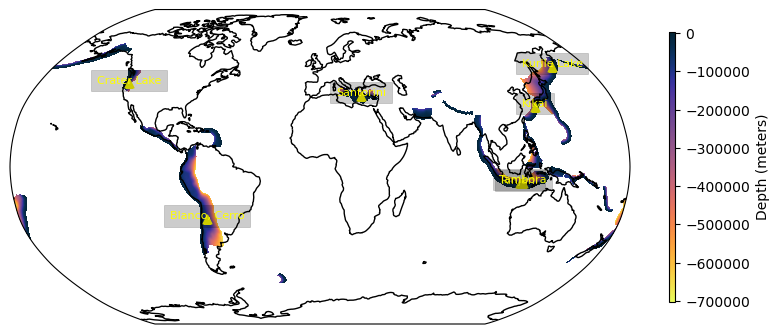

In [88]:
import rockhound as rh
import matplotlib.pyplot as plt
import cmocean
import cartopy.crs as ccrs

from rockhound.slab2 import ZONES

eruptions_data=pd.read_csv("raw_data.csv",skiprows=1)
eruptions_data=eruptions_data[['Volcano Name','Longitude','Latitude']]
unique_eruptions = eruptions_data.drop_duplicates(subset=['Volcano Name'])
volcano=['Tambora', 'Rinjani', 'Santorini','Blanco, Cerro','Kikai','Crater Lake','Kurile Lake']
selected_eruptions =unique_eruptions[unique_eruptions['Volcano Name'].isin(volcano)]
selected_eruptions=selected_eruptions.rename(columns={'Volcano Name': 'Volcano'})

subduction_zones = []
for zone in ZONES:
    subduction_zones.append(rh.fetch_slab2(zone))

vmax = max([grid.depth.actual_range[1] for grid in subduction_zones])
vmin = min([grid.depth.actual_range[0] for grid in subduction_zones])

plt.figure(figsize=(10, 5))
ax.set_title("Największe erupcje, a strefy subdukcji")
ax = plt.axes(projection=ccrs.Robinson())
for grid in subduction_zones:
    pc = grid.depth.plot.pcolormesh(
        cmap=cmocean.cm.thermal_r,
        ax=ax,
        transform=ccrs.PlateCarree(),
        add_colorbar=False,
        vmin=vmin,
        vmax=vmax,
    )
plt.colorbar(
    pc,
    ax=ax,
    label="Depth (meters)",
    pad=0.05,
    aspect=40,
    shrink=0.7,
    orientation="vertical",
)

ax.scatter(
   selected_eruptions['Longitude'],
   selected_eruptions['Latitude'],
   s=40, # Rozmiar punktu
   c='yellow', # Kolor
   marker='^',
   transform=ccrs.PlateCarree(), # Układ współrzędnych
   zorder=3 # warstwa
)

for row in selected_eruptions.itertuples():
    x, y, volcano_name = row.Longitude, row.Latitude, row.Volcano
    label_text = ax.text(
        x, y, volcano_name, ha='center', transform=ccrs.PlateCarree(), fontsize=8, color='yellow'
    )
    label_text.set_bbox(dict(facecolor='black', alpha=0.2, edgecolor='black', linewidth=0.5))

ax.set_global()
ax.coastlines()
plt.show()

W pierwszym podpunkcie przyglądamy się danym odnośnie wulkanów o największwiększej wartości VEI (dla naszych danych). VEI(Volcanic Explosivity Index) mówi nam o eksplozywności erupcji wulkaniczych. Rzeczywista skala mieści się w granicach od 0(erupcje nieeksplozywne) do 8(największe znane w historii erupcje), jednak dla naszych danych z okresu holocenu erupcje o VEI równym 8 nie miały miejsca, stąd brak ich uwzględnienia w "największych erupcjach" czy dalszej analizie danych wulkanicznych. Na powyższej mapie możemy zauwazyć, że wysoce ekspolzywne erupcje wulkaniczne pokrywają się ze strefami subdukcji zaznaczonych na mapie. Z teorii wynika, że wulkany znajdujące się w tych strefach są zazwyczaj strome, co sprzyja ich większej ekspozywności, a co za tym idzie, wyższym współczynnikiem VEI. Jak możemy zauważyć na pierwszej grafice, wszytskie wulkany z analizowanych danych są rozsiane po całej mapie, niekoniecznie w strefach subdukcji, co może potwierdzać nasz wniosek, że apekt dużej intensywności pokrywa się znacznie z tym ukształtowaniem terenu.

### Najaktywniejsze wulkany

![](most_active_df.png)

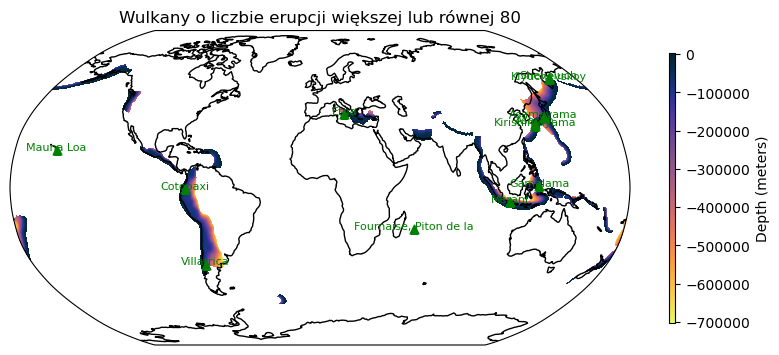

In [90]:
eruptions_data=pd.read_csv("raw_data.csv",skiprows=1)
eruptions_data=eruptions_data[['Volcano Name','Longitude','Latitude']]
unique_eruptions = eruptions_data.drop_duplicates(subset=['Volcano Name'])
volcano=['Fournaise, Piton de la', 'Asosan', 'Villarrica','Asamayama','Etna','Mauna Loa','Klyuchevskoy','Sheveluch','Gamalama','Merapi','Cotopaxi','Kirishimayama']
selected_eruptions =unique_eruptions[unique_eruptions['Volcano Name'].isin(volcano)]
selected_eruptions=selected_eruptions.rename(columns={'Volcano Name': 'Volcano'})

subduction_zones = []
for zone in ZONES:
    subduction_zones.append(rh.fetch_slab2(zone))

vmax = max([grid.depth.actual_range[1] for grid in subduction_zones])
vmin = min([grid.depth.actual_range[0] for grid in subduction_zones])

plt.figure(figsize=(10, 5))
ax.set_title("Najaktywnijsze wulkany, a strefy subdukcji")
ax = plt.axes(projection=ccrs.Robinson())
for grid in subduction_zones:
    pc = grid.depth.plot.pcolormesh(
        cmap=cmocean.cm.thermal_r,
        ax=ax,
        transform=ccrs.PlateCarree(),
        add_colorbar=False,
        vmin=vmin,
        vmax=vmax,
    )
    
plt.colorbar(
    pc,
    ax=ax,
    label="Depth (meters)",
    pad=0.05,
    aspect=40,
    shrink=0.7,
    orientation="vertical",
)

ax.scatter(
   selected_eruptions['Longitude'],
   selected_eruptions['Latitude'],
   s=40, # Rozmiar punktu
   c='green', # Kolor
   marker='^',
   transform=ccrs.PlateCarree(), # Układ współrzędnych
   zorder=3 # warstwa
)

for row in selected_eruptions.itertuples():
    ax.text(
        row.Longitude,
        row.Latitude,
        row.Volcano,
        ha='center',
        transform=ccrs.PlateCarree(),
        fontsize=8,
        color='green'
    )

ax.set_title("Wulkany o liczbie erupcji większej lub równej 80")
ax.set_global()
ax.coastlines()
plt.show()

Na powyższej mapie możemy zauważyć, że najaktywnijsze wulkany również znajdują się w większości na stykach płyt tektonicznych, jednak widzimy tu dwa wyjątki. Wulkany Piton de la Fournaise oraz Mauna Loa odbiegają od tej zasady. Można przyjrzeć się więc co wyróznia te dwa wulkany w odniesieniu do innych najaktywniejszych. Możemy dowiedzieć się, że zarówno Piton de la Fournaise jak i Mauna Loa są wulkanami tarczowymi, a więc powstają na skutek powolnego uwalniania lawy z wnętrza ziemi, a ich erupcje są zwykle łagodne i przewidywalne. Możemy potwierdzić to poniższą tabelą danych, gdzie uwzględnimy również średnią wartość VEI dla wszytskich erupcji dla najaktywniejszych wulkanów.

![](most_active.png)

Widzimy, że dla dwóch wulkanów tarczowych wartość eksplozywności erupcji jest znacznie mniejsza niż dla pozostałych, szczególnie dla wulkanu Mauna Loa. Potwierdza to nasze wcześniejsze wnioski, że wulkany o większych wartościcach VEI będą znajdować się zazwyczaj w obrębie stref subdukcji. Wnioksujemy tu też, że sama częstotliwość aktywności wulkanicznej nie musi być z tym powiązana.

### Ostatnie erupcje o określonej wielkości

![](last_eruption_df.png)

### Zliczenia wartości VEI ze względu na kategorię erupcji

![](rozdzilczy.png)

Na wykresach możemy zaobserwować znaczą przewagę liczby erupcji o współczynniku VEI równym 2, a więc tych erupcji, które mają umiarkowany stopnień eksplozywności. Może to wynkiać z wileu czynników, takich jak charakterystyka geologiczna, która może sprzyjać eksplozjom na tym poziomie. Poza tym erupcje o większej intensywności wydają się łatwijsze to zaobserwowania niż te o mniejszych wartościach VEI, mogą zostawiać po sobie też o wiele bardziej wyrażne ślady. 
Możemy zauwazyć ponadto, że erupcje dla VEI większego od 3 stanowią znaczną mniejszą w całości danych oraz niemal braku takich niepotwierdzonych obserwacji. Wnioskujemy więc że bardziej eksplozywne erupcje są zdecydowanie rzadsze, ale też znacznie trudnijsze do niejednoznacznej oceny. Swiadczyć to może o tym, że erupcje o dużym VEI są zazwyczaj bardzo dobrze widoczne i proste do zdefiniowania, co nie zawsze jest, czy było, tak oczywiste dla wulkanów o średnich lub niskich współczynnkich eksplozywności.

### Rodzaje metod wykrywania erupcji

![](evidence_data.png)

.....................

### Wizualizacja rozkładu zarejestrowanych erupcji w czasie

![](wczasie.png)

............